In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Read in Data And Import Necessary Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
plt.style.use('ggplot')
from nltk.tokenize import word_tokenize
import gensim
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

In [5]:
df = pd.read_csv('amazon_reviews.csv')

In [6]:
df.head

<bound method NDFrame.head of       Unnamed: 0  reviewerName  overall   
0              0           NaN      4.0  \
1              1          0mie      5.0   
2              2           1K3      4.0   
3              3           1m2      5.0   
4              4  2&amp;1/2Men      5.0   
...          ...           ...      ...   
4910        4910        ZM "J"      1.0   
4911        4911            Zo      5.0   
4912        4912     Z S Liske      5.0   
4913        4913      Z Taylor      5.0   
4914        4914           Zza      5.0   

                                             reviewText  reviewTime  day_diff   
0                                            No issues.  2014-07-23       138  \
1     Purchased this for my device, it worked as adv...  2013-10-25       409   
2     it works as expected. I should have sprung for...  2012-12-23       715   
3     This think has worked out great.Had a diff. br...  2013-11-21       382   
4     Bought it with Retail Packaging, arrived l

In [7]:
df.columns

Index(['Unnamed: 0', 'reviewerName', 'overall', 'reviewText', 'reviewTime',
       'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


In [9]:
df.nunique(axis = 0)

Unnamed: 0              4915
reviewerName            4594
overall                    5
reviewText              4912
reviewTime               690
day_diff                 690
helpful_yes               23
helpful_no                17
total_vote                26
score_pos_neg_diff        27
score_average_rating      28
wilson_lower_bound        40
dtype: int64

In [10]:
df.isnull().sum()

Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [11]:
df = df[df['reviewerName'].notnull()]
df = df[df['reviewText'].notnull()]

In [12]:
df.isnull().sum()

Unnamed: 0              0
reviewerName            0
overall                 0
reviewText              0
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

# Data Visualization 


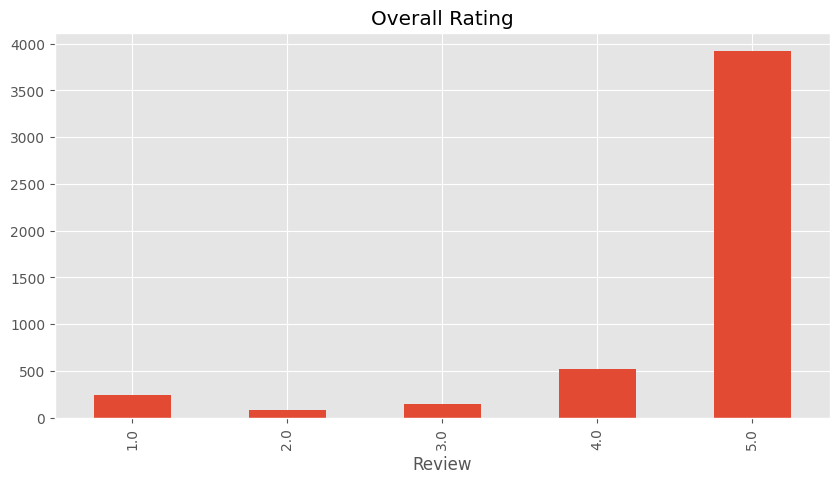

In [ ]:
ad = df['overall'].value_counts().sort_index().plot(kind = 'bar', title = "Overall Rating", figsize = (10,5))
ad.set_xlabel("Review")
plt.show()

<Axes: title={'center': 'Avg. Rating'}, xlabel='score_average_rating'>

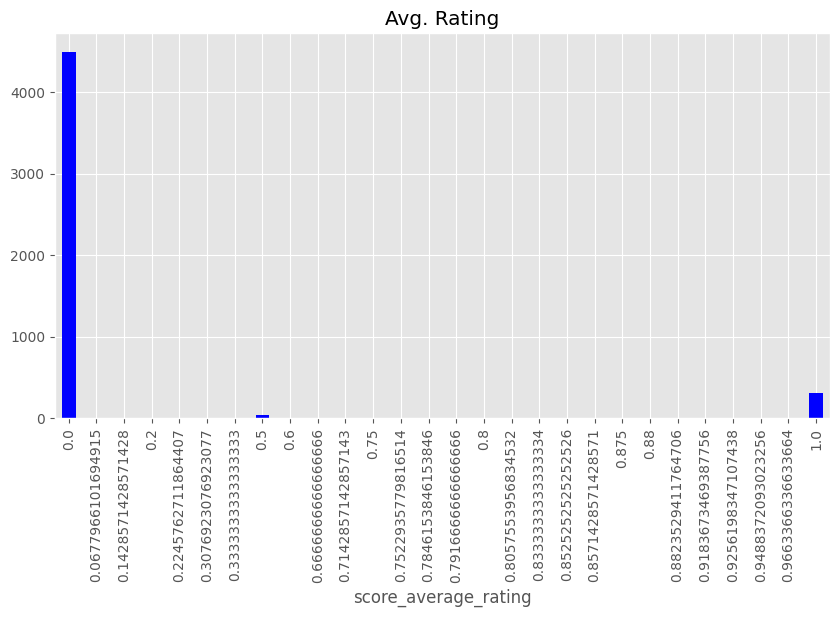

In [14]:
df['score_average_rating'].value_counts().sort_index().plot(kind = 'bar', title = "Avg. Rating", figsize = (10,5), color = 'blue')

<Axes: title={'center': 'Number of votes given to the evaluation'}, xlabel='total_vote'>

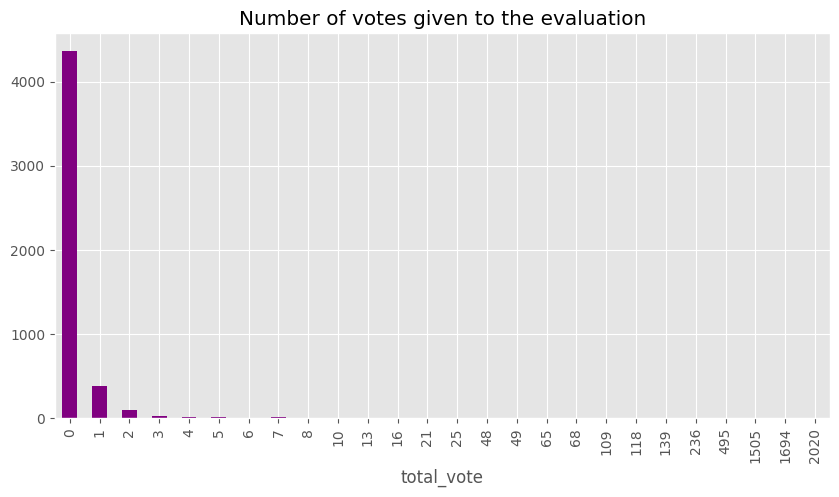

In [15]:
df['total_vote'].value_counts().sort_index().plot(kind = 'bar', title = 'Number of votes given to the evaluation', figsize = (10,5), color = 'purple')

In [17]:
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,1,0mie,5.0,"purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. i should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,this think has worked out great.had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"bought it with retail packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
5,5,2Cents!,5.0,it's mini storage. it doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.0


In [19]:
for i in df:
    if i == 'reviewText':
        df[i] = df[i].str.lower()
        df[i] = df[i].str.replace('[^\w\s]', '')
        df[i] = df[i].str.replace('\d', '')
        
        
df
    

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,1,0mie,5.0,"purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. i should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,this think has worked out great.had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"bought it with retail packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
5,5,2Cents!,5.0,it's mini storage. it doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,i bought this sandisk 16gb class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,great card that is very fast and reliable. it ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,good amount of space for the stuff i want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


In [20]:
old_name = 'Unnamed: 0'
new_name = 'ID'

df = df.rename(columns = {old_name:new_name})
df.head()


,ID,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,1,0mie,5.0,"purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. i should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,this think has worked out great.had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"bought it with retail packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
5,5,2Cents!,5.0,it's mini storage. it doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.0


In [21]:
df

,ID,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,1,0mie,5.0,"purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. i should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,this think has worked out great.had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"bought it with retail packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
5,5,2Cents!,5.0,it's mini storage. it doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,i bought this sandisk 16gb class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,great card that is very fast and reliable. it ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,good amount of space for the stuff i want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


In [29]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [24]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sunda\AppData\Roaming\nltk_data...


True

In [25]:
sia = SentimentIntensityAnalyzer()

In [26]:
df['reviewText'][10]

'i like this sd card because it can take music video downloads, personal videos, files,docs, and multimedia images with a fast transfer rate of class 10 speed. it can take games with large files very easily and still have enough space for apps. it&#34;s great for video cameras and camcorders with the supplied adapter. fits very easily into smartphones and tablets sd card slots. i recommend this 32gb sd card to everyone.'

In [27]:
sia.polarity_scores(df['reviewText'][10])

{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'compound': 0.9258}

In [28]:
df.columns

Index(['ID', 'reviewerName', 'overall', 'reviewText', 'reviewTime', 'day_diff',
       'helpful_yes', 'helpful_no', 'total_vote', 'score_pos_neg_diff',
       'score_average_rating', 'wilson_lower_bound'],
      dtype='object')

In [30]:
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['reviewText']
    myid = row['ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/4913 [00:00<?, ?it/s]

In [31]:
pd.DataFrame(res).T

,neg,neu,pos,compound
1,0.075,0.925,0.000,-0.2960
2,0.077,0.923,0.000,-0.3089
3,0.000,0.909,0.091,0.7081
4,0.038,0.835,0.127,0.7087
5,0.000,1.000,0.000,0.0000
...,...,...,...,...
4910,0.091,0.817,0.092,0.0018
4911,0.000,0.939,0.061,0.1761
4912,0.000,0.828,0.172,0.8588
4913,0.000,0.802,0.198,0.4939


In [32]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {'index':'ID'})
vaders = vaders.merge(df, how = 'left')

In [33]:
vaders

,ID,neg,neu,pos,compound,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,1,0.075,0.925,0.000,-0.2960,0mie,5.0,"purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
1,2,0.077,0.923,0.000,-0.3089,1K3,4.0,it works as expected. i should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
2,3,0.000,0.909,0.091,0.7081,1m2,5.0,this think has worked out great.had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
3,4,0.038,0.835,0.127,0.7087,2&amp;1/2Men,5.0,"bought it with retail packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
4,5,0.000,1.000,0.000,0.0000,2Cents!,5.0,it's mini storage. it doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4908,4910,0.091,0.817,0.092,0.0018,"ZM ""J""",1.0,i bought this sandisk 16gb class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4909,4911,0.000,0.939,0.061,0.1761,Zo,5.0,used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4910,4912,0.000,0.828,0.172,0.8588,Z S Liske,5.0,great card that is very fast and reliable. it ...,2014-03-31,252,0,0,0,0,0.0,0.0
4911,4913,0.000,0.802,0.198,0.4939,Z Taylor,5.0,good amount of space for the stuff i want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


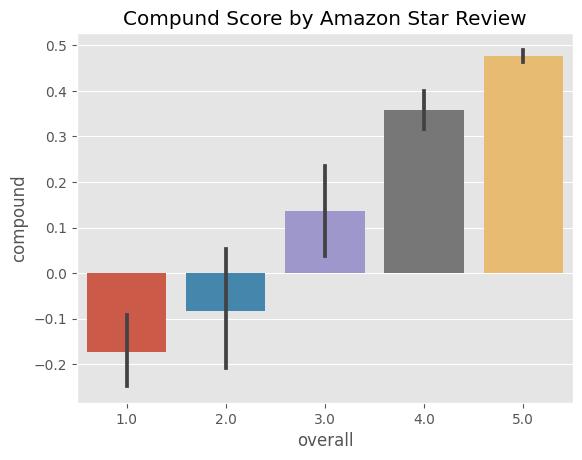

In [34]:
gph = sns.barplot(data = vaders, x = 'overall', y = 'compound')
gph.set_title('Compund Score by Amazon Star Review')
plt.show()

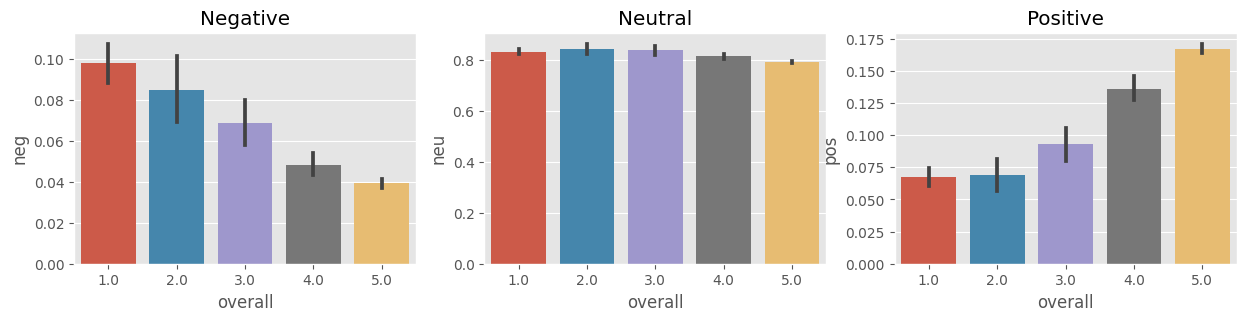

In [35]:
fig, ax = plt.subplots(1,3, figsize = (15,3))
sns.barplot(data = vaders, x = 'overall', y = 'neg', ax = ax[0])
sns.barplot(data = vaders, x = 'overall', y = 'neu', ax = ax[1])
sns.barplot(data = vaders, x = 'overall', y = 'pos', ax = ax[2])
ax[0].set_title('Negative')
ax[1].set_title('Neutral')
ax[2].set_title('Positive')
plt.show()

**Roberta Pretrained Model**

This is a roBERTa-base model trained on ~58M tweets and finetuned for sentiment analysis with the TweetEval benchmark. This model is suitable for English (for a similar multilingual model)



In [37]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [38]:
Model = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(Model)
model = AutoModelForSequenceClassification.from_pretrained(Model)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

c:\Python310\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\sunda\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [39]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors = 'pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberat_pos' : scores[2]
    }
    return scores_dict
polarity_scores_roberta("This is too good")

{'roberta_neg': 0.0028646875,
 'roberta_neu': 0.010610016,
 'roberat_pos': 0.9865253}

In [40]:
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    try:
        text = row['reviewText']
        myid = row['ID']
        vader_results = sia.polarity_scores(text)
        vader_results_rename = {}
        for key, value in vader_results.items():
            vader_results_rename[f"vader_{key}"] = value
        roberta_results = polarity_scores_roberta(text)
        combine = {**vader_results, **roberta_results}
        res[myid] = combine
    except Exception as e:
        print(f"Error processing ID {myid}: {e}")
    

  0%|          | 0/4913 [00:00<?, ?it/s]

Error processing ID 76: The expanded size of the tensor (1092) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1092].  Tensor sizes: [1, 514]
Error processing ID 123: The expanded size of the tensor (1183) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1183].  Tensor sizes: [1, 514]
Error processing ID 722: The expanded size of the tensor (757) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 757].  Tensor sizes: [1, 514]
Error processing ID 1380: The expanded size of the tensor (587) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 587].  Tensor sizes: [1, 514]
Error processing ID 2031: The expanded size of the tensor (1430) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1430].  Tensor sizes: [1, 514]
Error processing ID 2799: The expanded size of the tensor (637) must match the existing size (514) at non-si

In [41]:
results = pd.DataFrame(res).T
results = results.reset_index().rename(columns = {'index':'ID'})
results = results.merge(df, how = 'left')


In [42]:
results.head()

,ID,neg,neu,pos,compound,roberta_neg,roberta_neu,roberat_pos,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,1,0.075,0.925,0.000,-0.2960,0.006695,0.084906,0.908400,0mie,5.0,"purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
1,2,0.077,0.923,0.000,-0.3089,0.382923,0.465266,0.151811,1K3,4.0,it works as expected. i should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
2,3,0.000,0.909,0.091,0.7081,0.002420,0.018434,0.979146,1m2,5.0,this think has worked out great.had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
3,4,0.038,0.835,0.127,0.7087,0.003562,0.060882,0.935556,2&amp;1/2Men,5.0,"bought it with retail packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
4,5,0.000,1.000,0.000,0.0000,0.106499,0.518373,0.375128,2Cents!,5.0,it's mini storage. it doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.0


**Comparing the Models**
Vader & Roberta

In [43]:
results.columns

Index(['ID', 'neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberat_pos', 'reviewerName', 'overall', 'reviewText', 'reviewTime',
       'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'],
      dtype='object')

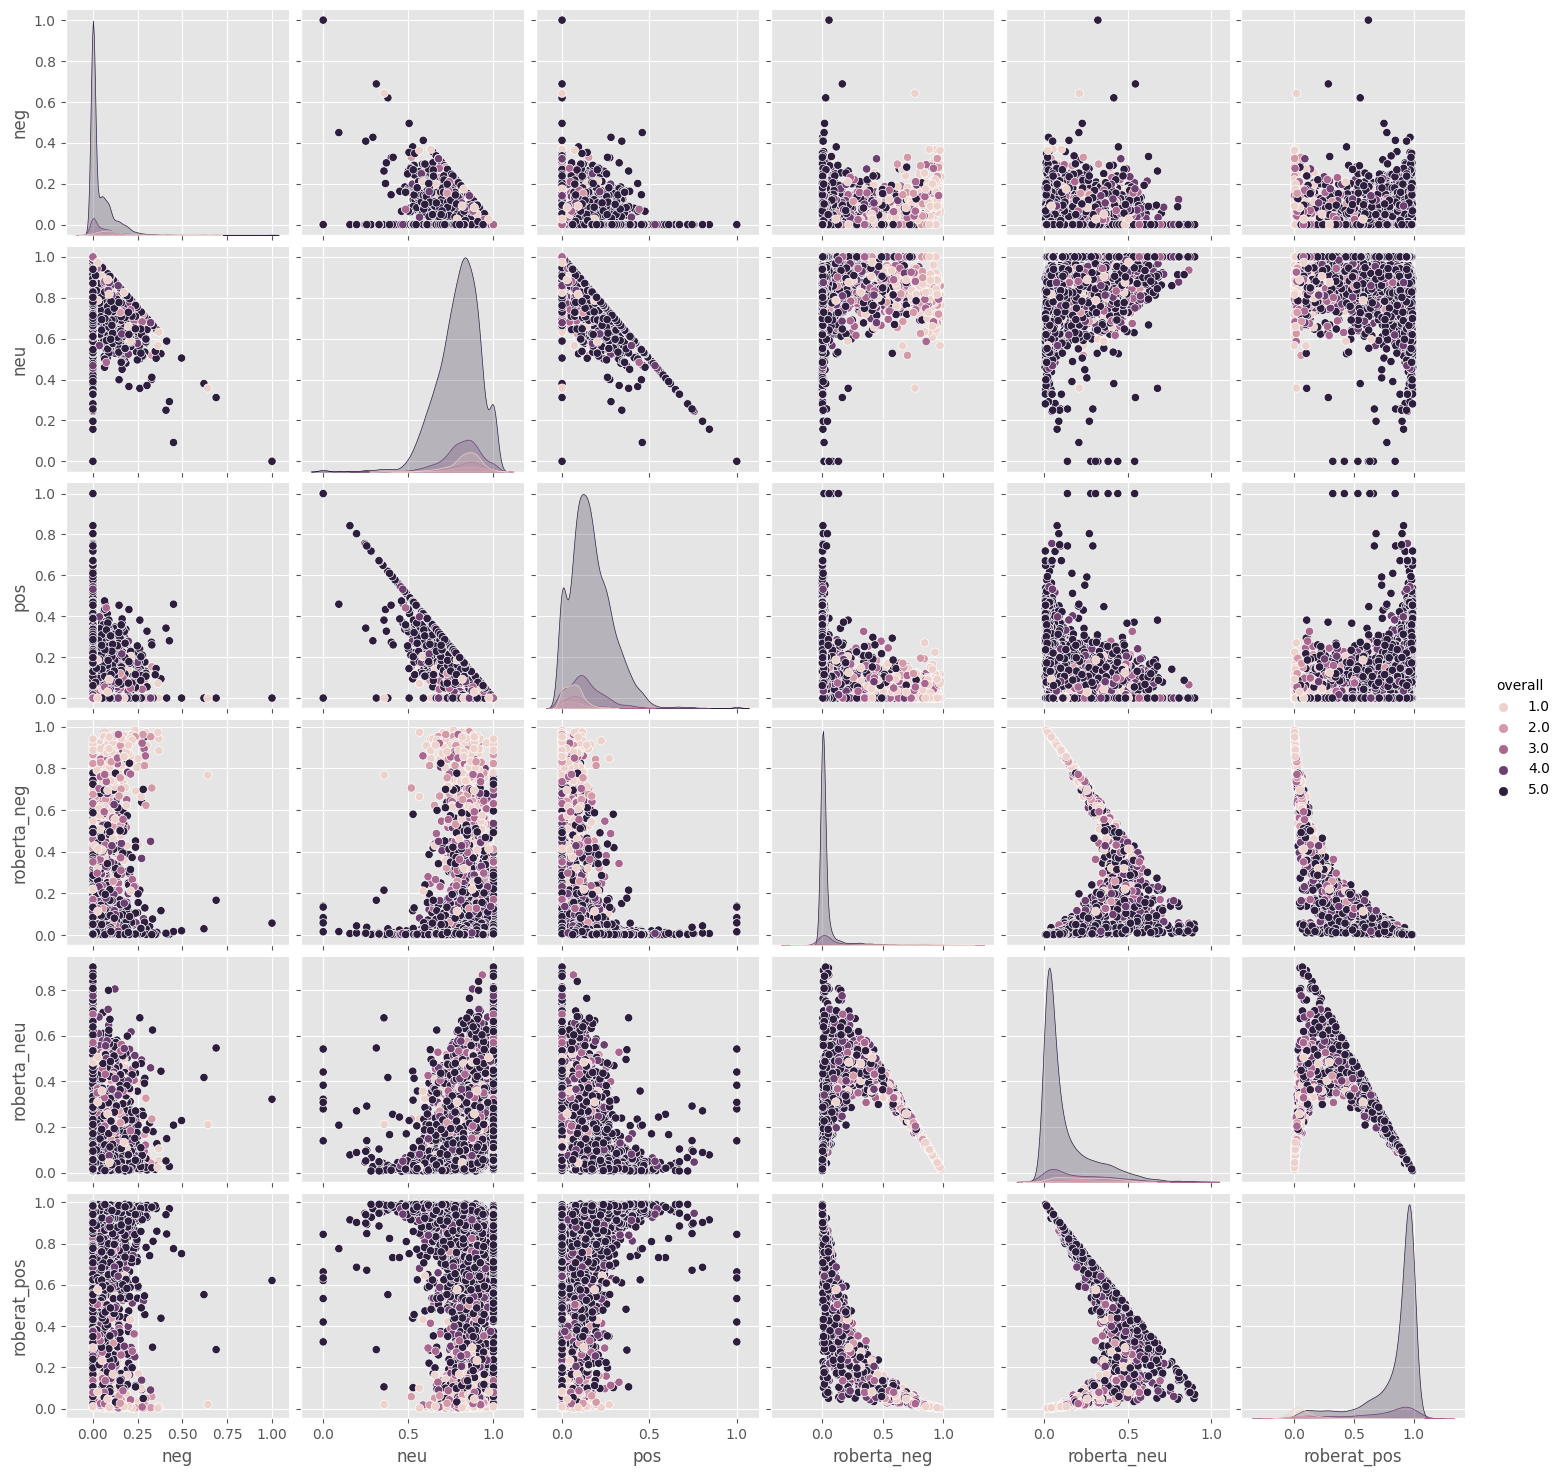

In [44]:
sns.pairplot(data = results, vars = ['neg', 'neu', 'pos', 'roberta_neg', 'roberta_neu', 'roberat_pos'], hue = 'overall')
plt.show()

In [46]:
results.query('overall==5').sort_values('roberat_pos', ascending = False)

,ID,neg,neu,pos,compound,roberta_neg,roberta_neu,roberat_pos,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1533,1539,0.000,0.593,0.407,0.9440,0.001793,0.005205,0.993003,Elchis,5.0,i love this product. the space is perfect for...,2013-07-28,498,0,0,0,0,0.0,0.0
795,800,0.000,0.527,0.473,0.9463,0.001514,0.005527,0.992959,Byron Foster,5.0,"love this micro sd card, but love the fact tha...",2014-05-20,202,0,0,0,0,0.0,0.0
3577,3590,0.000,0.708,0.292,0.9080,0.001641,0.005517,0.992843,perez,5.0,i love it so far it works as it should the pri...,2013-12-20,353,0,0,0,0,0.0,0.0
4047,4062,0.000,0.707,0.293,0.8519,0.001434,0.005833,0.992733,Satish,5.0,this is one of the best. bought it for my phon...,2013-09-08,456,0,0,0,0,0.0,0.0
2867,2875,0.000,0.671,0.329,0.9354,0.001702,0.005634,0.992664,Lothos,5.0,"this is my first sandisk card, i have a bunch ...",2014-04-18,234,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,137,0.185,0.815,0.000,-0.9042,0.892579,0.094972,0.012449,Alex X,5.0,"appears to be class 10, holds about as much as...",2013-11-03,400,0,0,0,0,0.0,0.0
2583,2590,0.146,0.854,0.000,-0.5574,0.863961,0.123739,0.012301,Kamal O Rowe,5.0,made the mistake of leaving it in the car when...,2013-06-03,553,0,1,1,-1,0.0,0.0
1658,1664,0.179,0.750,0.071,-0.8300,0.922231,0.068605,0.009164,fordman,5.0,i only buy thru amazon i've tried ebay and you...,2014-09-07,92,0,0,0,0,0.0,0.0
3371,3383,0.172,0.828,0.000,-0.4019,0.897045,0.095145,0.007810,nathanthowell,5.0,my only problem is that i have not been able t...,2014-04-07,245,0,0,0,0,0.0,0.0


**Examples**

In [47]:
results.query('overall == 1').sort_values('roberat_pos', ascending = False)['reviewText'].values[0]

'i returned to order a 11.6 laptop so i could have full operations than having a notebook. i am sure this is good quality as i have purchased san disk numerous times.'

In [48]:
results.query('overall == 5').sort_values('roberta_neg', ascending = False)['reviewText'].values[0]

'works! and why should i write more..... damn it! eleven more words... finally am done with this, crap!! three more words??'

In [50]:
results.query('overall == 4').sort_values('roberta_neu',ascending = False)['reviewText'].values[0]

'comore esta memorka para completar mi nueva samsunb galaxy tab y funciono muy bien...ahora tengo 48 gb de memoria para alamcenar info.'

In [39]:
results.query('overall == 5').sort_values('pos', ascending = False)['reviewText'].values[0]

'super'

In [40]:
results.query('overall == 1').sort_values('neg', ascending = False)['reviewText'].values[0]

'failed after a year!'

In [52]:
results.query('overall == 3').sort_values('neu',ascending = False)['reviewText'].values[0]

"it works, but file writes are a bit slower than expected on a usb3 reader.also, both reads and writes are faster with the card inside the standard-size sd adapter (15 mb/s vs 10 write; 45 mb/s vs 22 mb/s read) on the same card reader.  can't figure why..."